In [3]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler  # Add this import

In [4]:
# Load your dataset and drop the 'Id' column
data = pd.read_csv(r'C:\Users\risha\Desktop\py\Task 3\Iris.csv')
data.drop('Id', axis=1, inplace=True)  # Drop the 'Id' column

In [5]:
# Display the first 10 rows of the dataset
print("First 10 rows of the dataset:")
print(data.head(10))

First 10 rows of the dataset:
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa
5            5.4           3.9            1.7           0.4  Iris-setosa
6            4.6           3.4            1.4           0.3  Iris-setosa
7            5.0           3.4            1.5           0.2  Iris-setosa
8            4.4           2.9            1.4           0.2  Iris-setosa
9            4.9           3.1            1.5           0.1  Iris-setosa


In [6]:
# Checking the shape (number of rows and columns) of the dataset
print("\nShape of the dataset:")
print(data.shape)


Shape of the dataset:
(150, 5)


In [7]:
# Displaying summary statistics of the dataset
print("\nSummary statistics of the dataset:")
print(data.describe())


Summary statistics of the dataset:
       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000


In [8]:
# Getting information about the dataset, including data types and non-null counts
print("\nInformation about the dataset:")
print(data.info())


Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [9]:
# Checking for missing values in the dataset
print("\nMissing values in the dataset:")
print(data.isnull().sum())


Missing values in the dataset:
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [10]:
# Calculate the mean values of each feature for different Species
mean_values = data.groupby('Species').mean()
print("\nMean values for each feature by Species:")
print(mean_values)


Mean values for each feature by Species:
                 SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
Species                                                                  
Iris-setosa              5.006         3.418          1.464         0.244
Iris-versicolor          5.936         2.770          4.260         1.326
Iris-virginica           6.588         2.974          5.552         2.026


In [11]:
# Counting the Occurrences of Species and Representing Via Pie Chart
species_counts = data['Species'].value_counts()
print("\nOccurrences of Species:")
print(species_counts)


Occurrences of Species:
Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


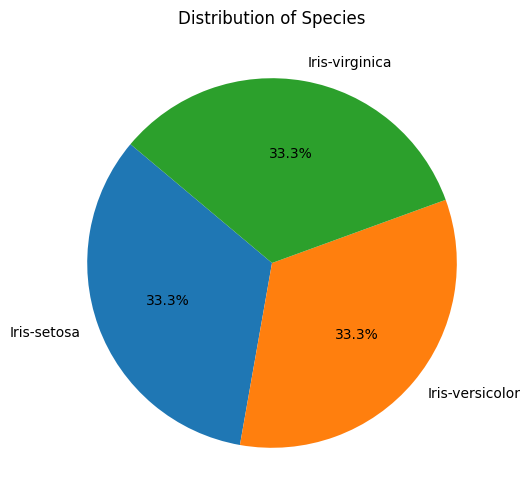

In [12]:
plt.figure(figsize=(6, 6))
plt.pie(species_counts, labels=species_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Species")
plt.show()

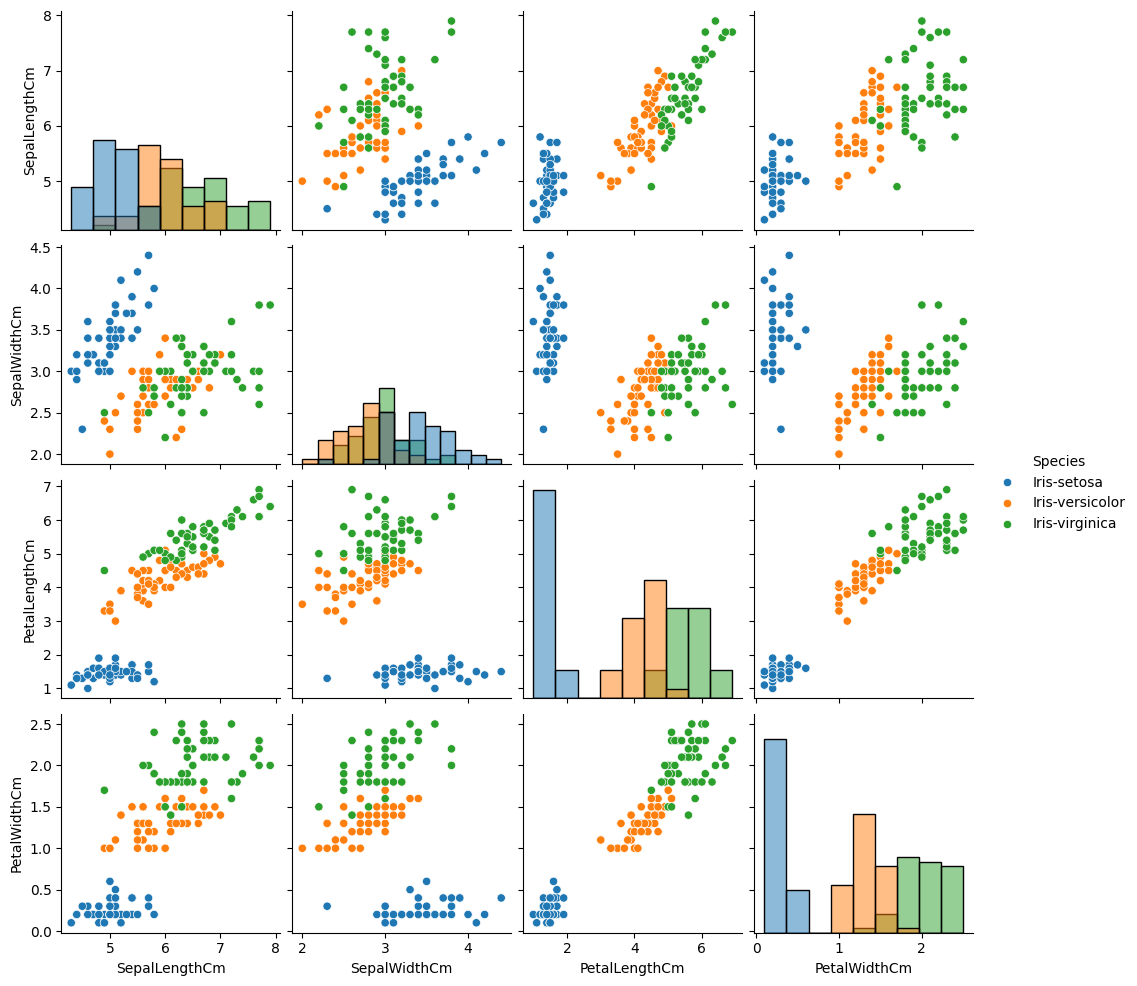

In [13]:
# Create a pairplot to visualize relationships between different features based on Species
sns.pairplot(data, hue="Species", diag_kind="hist")

In [14]:
#import the necessary libraries
from matplotlib.colors import ListedColormap

In [15]:
# Define a custom color map with Blue and Pink
custom_colors = ['#FBEAEB', '#2F3C7E']
custom_cmap = ListedColormap(custom_colors)

In [16]:
# Create the heatmap with the custom color map
plt.figure(figsize=(8, 6))

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

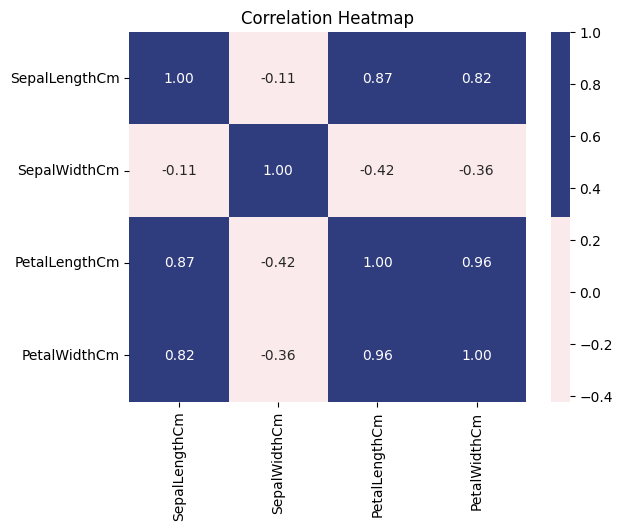

In [17]:
# Exclude the 'Species' column from the correlation calculation
correlation_matrix = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap=custom_cmap, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

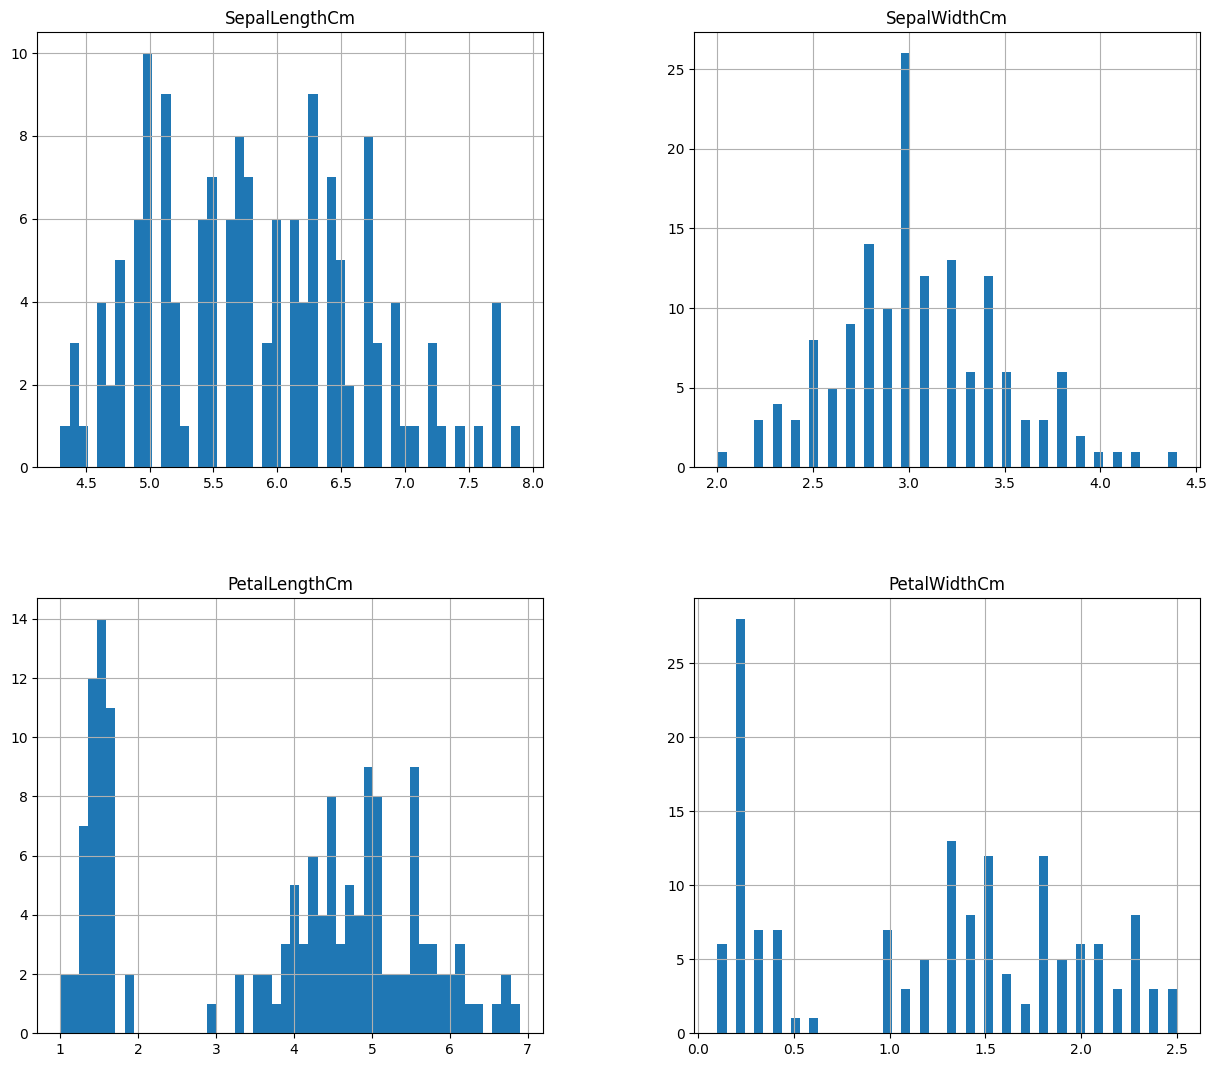

In [18]:
# Creating histograms for each feature, including 'Species' column, to visualize their distributions
selected_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

data[selected_columns + ['Species']].hist(figsize=(15, 13), bins=50)
plt.show()

In [19]:
# Defining the Features/Independent Variables (X) and Target variable/Dependent Variable (y)
x = data.drop('Species', axis=1)
y = data['Species']

In [20]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [21]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [23]:
# Make predictions on the test set
y_pred = clf.predict(X_test)

In [24]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'\nRandom Forest Classifier Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)


Random Forest Classifier Accuracy: 1.00
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [25]:
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [26]:
# Binary classification metrics for the Logistic Regression model
le = LabelEncoder()
y_train_binary = le.fit_transform(y_train)
y_test_binary = le.transform(y_test)

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train_binary)
y_pred_logistic = logistic_model.predict(X_test)

precision = precision_score(y_test_binary, y_pred_logistic, average='weighted')
recall = recall_score(y_test_binary, y_pred_logistic, average='weighted')
f1 = f1_score(y_test_binary, y_pred_logistic, average='weighted')

In [27]:
print("\nLogistic Regression Multiclass Classification Metrics:")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Logistic Regression Multiclass Classification Metrics:
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


In [28]:
# Confusion Matrix of Logistic Regression
conf_matrix_logistic = confusion_matrix(y_test_binary, y_pred_logistic)
print("Confusion Matrix (Logistic Regression):")
print(conf_matrix_logistic)

Confusion Matrix (Logistic Regression):
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [29]:
# Creating new data for prediction (you can replace the values with your own data)
new_data = pd.DataFrame({
    'SepalLengthCm': [5.0, 6.2, 4.8],
    'SepalWidthCm': [3.5, 3.9, 3.0],
    'PetalLengthCm': [1.4, 5.4, 1.3],
    'PetalWidthCm': [0.2, 2.3, 0.2]
})

In [30]:
# Removing the 'Id' column from new data
new_data = new_data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

In [31]:
# Standardize the new data
new_data_standardized = scaler.transform(new_data)

In [32]:
# Use the trained Random Forest Classifier to predict the species of the new data
new_data_predictions = clf.predict(new_data_standardized)
print("\nPredicted Species for New Data:")
print(new_data_predictions)


Predicted Species for New Data:
['Iris-setosa' 'Iris-virginica' 'Iris-setosa']
